# **Lab 7: Optimization and learning**
**Fabián Levicán**

# **Abstract**

This is the sixth lab in the course DD2363 Methods in Scientific Computing. It is about using Jupyter to implement two minimization methods: gradient descent and Newton minimization. Some objectives may be to become familiar with numerical optimization, the differences between the various existing methods, and to understand more applications of Taylor's formula. The results of this method are then tested for accuracy and convergence, and they are favorable.

#**About the code**

In [1]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""

# Copyright (C) 2020 Fabián Levicán (fils2@kth.se)

# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

In [0]:
# Load neccessary modules.
from google.colab import files

import math
import matplotlib.pyplot as plt
import time
import numpy as np

# **Introduction**

In scientific computing we often encounter functions for which we seek their local or global optima. The two algorithms we present here are for unconstrained (open and unbounded domain) minimization of functions from $\mathbb{R}^n$ into $\mathbb{R}$. In both algorithms we start from an initial guess and improve it iteratively.

From Taylor's formula we can obtain that the direction of greatest descent at a point is that of the negative of the gradient of the function at the point. A method that moves in this direction is a gradient descent method.

In our version of the gradient descent method we choose the step factor $\alpha$ by doing a linear search $\alpha = 0.0001, \alpha = 0.0002, \ldots, \alpha = 1$ and minimizing the function at $x - \alpha\nabla f(x)$. If no alpha such that $f(x - \alpha\nabla f(x)) < f(x)$ is found in the linear search at any step, the algorithm halts. If $\|\nabla f(x)\| \leq TOL$ at any step, the algorithm also halts.

From further expansion of Taylor's formula we also obtain that, if $Hf(x)$ is non-singular, we can also use the increment $-Hf(x)^{-1}\nabla f(x)$. A method that does this is a Newton minimization method.

The aforementioned results and further information can be found in the notes from the relevant lectures.

# **Methods**

The `gradDesc` method takes as input:
* `func`, a function from $\mathbb{R}^n$ into $\mathbb{R}$.
* `grad`, the gradient of the function.
* `x0`, an initial guess.
The method outputs a tuple `(x, x[i])` where `x` is a list such that `x[j]` is the approximation at step `j` and `x[i]` is the approximation at the last step.

Further information about this method can be found in the Introduction section.

In [0]:
def gradDesc(func, grad, x0):
  x = [x0]
  i = 0
  gradx = grad(x[i])
  while np.linalg.norm(gradx) > 0.0001:
    alpha = 0
    minfunc = func(x[i])
    for j in range(10000):
      funceval = func(x[i]-(j+1)*0.0001*gradx)
      if funceval < minfunc:
        alpha = (j+1)*0.0001
        minfunc = funceval
    if alpha == 0:
      break
    x.append(x[i] - alpha*gradx)
    i += 1
    gradx = grad(x[i])
  return (x, x[i])

The `newtonMin` method has a signature identical to the previous method's, although it also takes a third parameter as input:
* `hessian`, the Hessian matrix of the function. 

In [0]:
def newtonMin(func, grad, hessian, x0):
  x = [x0]
  i = 0
  gradx = grad(x[i])
  hessianx = hessian(x[i])
  while np.linalg.norm(gradx) > 0.0001:
    if np.linalg.det(hessianx) == 0:
      print("Error: The Hessian matrix at one step is not invertible!")
      break
    x.append(x[i] - np.linalg.solve(hessianx, gradx))
    i += 1
    gradx = grad(x[i])
    hessianx = hessian(x[i])
  return(x, x[i])

# **Results**

We choose the following functions for the tests:

1. $f_1(x, y) = x^2+(y-5)^2$
2. $f_2(x, y) = x^4+(y-5)^4$
3. $f_3(x, y) = 100cos(x+y)$
4. $f_4(x, y) = y^4sin(x)$

The gradients are:

1. $\nabla f_1(x, y) = (2x, 2(y-5))$
2. $\nabla f_2(x, y) = (4x^3, 4(y-5)^3)$
3. $\nabla f_3(x, y) = (-100sin(x+y), -100sin(x+y))$
4. $\nabla f_4(x, y) = (y^4cos(x), 4y^3sin(x))$

The Hessian matrices are:

1. $Hf_1(x, y) = \left ( \begin{array}{cc}
2 & 0 \\
0 & 2
\end{array} \right )$
2. $Hf_2(x, y) = \left ( \begin{array}{cc}
12x^2 & 0 \\
0 & 12(y-5)^2
\end{array} \right )$
3. $Hf_3(x, y) = \left ( \begin{array}{cc}
-100cos(x+y) & -100cos(x+y) \\
-100cos(x+y) & -100cos(x+y)
\end{array} \right )$
4. $Hf_4(x, y) = \left ( \begin{array}{cc}
-y^4sin(x) & 4y^3cos(x) \\
4y^3cos(x) & 12y^2sin(x)
\end{array} \right )$

The initial guesses are all $(15, 15)$.

The critical points closest to the approximations found are:
1. $P_1 = (0, 5)$
2. $P_2 = (0, 5)$
3. $P_3 = (-4.5\pi, -4.5\pi)$
4. $P_4 = (5\pi, 0)$

We verify the accuracy of the methods as the error is very small.

We verify the convergence of the methods graphically with a $x$ vs. $y$ graph of the steps taken by them.

This first code cell outputs the tests for the `gradDesc` method which use the first three functions.

f(x, y) = (x)^2+(y-5)^2
Exact critical point:
[0 5]
Approx critical point:
[0. 5.]
Error:
0.0
Steps:
1


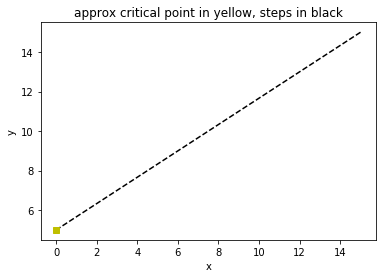

f(x, y) = (x)^4+(y-5)^4
Exact critical point:
[0 5]
Approx critical point:
[0.02620178 5.02578122]
Error:
0.03675873563084392
Steps:
180


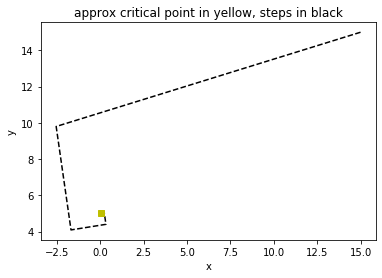

f(x, y) = 100cos(x+y)
Exact critical point:
[-14.13716694 -14.13716694]
Approx critical point:
[-14.13716694 -14.13716694]
Error:
1.4093149909145566e-12
Steps:
2


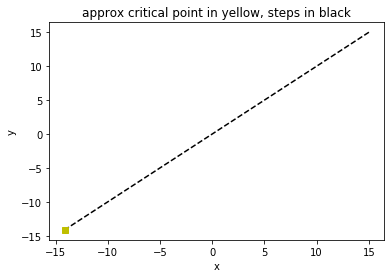

In [5]:
# GRADDESC TESTS

# FUNCTION #1

res = gradDesc(
  lambda x: (x[0])**2+(x[1]-5)**2,
  lambda x: np.array([2*x[0], 2*(x[1]-5)]),
  np.array([15, 15])
)
res0 = res[0]
res1 = res[1]
print("f(x, y) = (x)^2+(y-5)^2")
print("Exact critical point:")
print(np.array([0, 5]))
print("Approx critical point:")
print(res1)
print("Error:")
print(np.linalg.norm(np.array([0, 5])-res1))
print("Steps:")
print(len(res0) - 1)
xAxis = [res0[i][0] for i in range(len(res0))]
yAxis = [res0[i][1] for i in range(len(res0))]
plt.plot(xAxis, yAxis, 'k--')
plt.plot(res1[0], res1[1], 'ys')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approx critical point in yellow, steps in black')
plt.show()

# FUNCTION #2

res = gradDesc(
  lambda x: (x[0])**4+(x[1]-5)**4,
  lambda x: np.array([4*x[0]**3, 4*(x[1]-5)**3]),
  np.array([15, 15])
)
res0 = res[0]
res1 = res[1]
print("f(x, y) = (x)^4+(y-5)^4")
print("Exact critical point:")
print(np.array([0, 5]))
print("Approx critical point:")
print(res1)
print("Error:")
print(np.linalg.norm(np.array([0, 5])-res1))
print("Steps:")
print(len(res0) - 1)
xAxis = [res0[i][0] for i in range(len(res0))]
yAxis = [res0[i][1] for i in range(len(res0))]
plt.plot(xAxis, yAxis, 'k--')
plt.plot(res1[0], res1[1], 'ys')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approx critical point in yellow, steps in black')
plt.show()

# FUNCTION #3

res = gradDesc(
  lambda x: 100*math.cos(x[0]+x[1]),
  lambda x: np.array([-100*math.sin(x[0]+x[1]), -100*math.sin(x[0]+x[1])]),
  np.array([15, 15])
)
res0 = res[0]
res1 = res[1]
print("f(x, y) = 100cos(x+y)")
print("Exact critical point:")
print(np.array([-4.5*math.pi, -4.5*math.pi]))
print("Approx critical point:")
print(res1)
print("Error:")
print(np.linalg.norm(np.array([-4.5*math.pi, -4.5*math.pi])-res1))
print("Steps:")
print(len(res0) - 1)
xAxis = [res0[i][0] for i in range(len(res0))]
yAxis = [res0[i][1] for i in range(len(res0))]
plt.plot(xAxis, yAxis, 'k--')
plt.plot(res1[0], res1[1], 'ys')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approx critical point in yellow, steps in black')
plt.show()

This first code cell outputs the tests for the `newtonMin` method which use all four functions. Note that the method doesn't converge for the third function because the Hessian matrix is singular at one step.

f(x, y) = (x)^2+(y-5)^2
Exact critical point:
[0 5]
Approx critical point:
[0. 5.]
Error:
0.0
Steps:
1


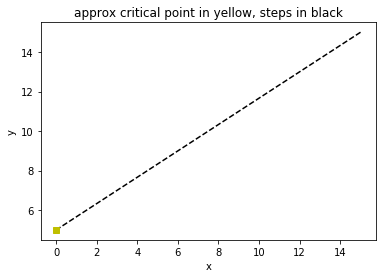

f(x, y) = (x)^4+(y-5)^4
Exact critical point:
[0 5]
Approx critical point:
[0.02283658 5.01522439]
Error:
0.02744615651315332
Steps:
16


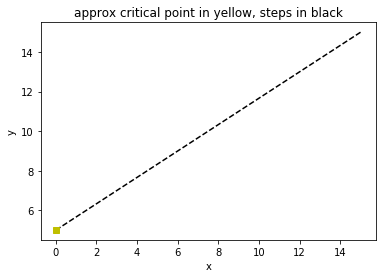

Error: The Hessian matrix at one step is not invertible!
f(x, y) = 100cos(x+y)
Exact critical point:
[-14.13716694 -14.13716694]
Approx critical point:
[15 15]
Error:
41.20617665730908
Steps:
0


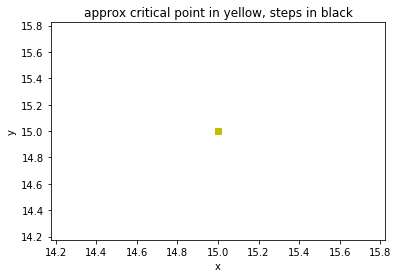

f(x, y) = y^2sin(x)
Exact critical point:
[15.70796327  0.        ]
Approx critical point:
[15.70316811  0.07602643]
Error:
0.07617750035246844
Steps:
18


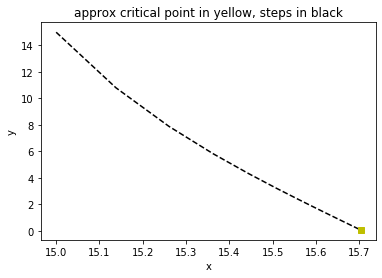

In [6]:
# NEWTONMIN TESTS

# FUNCTION #1

res = newtonMin(
  lambda x: (x[0])**2+(x[1]-5)**2,
  lambda x: np.array([2*x[0], 2*(x[1]-5)]),
  lambda x: np.array([
                      [2, 0],
                      [0, 2],
  ]),
  np.array([15, 15])
)
res0 = res[0]
res1 = res[1]
print("f(x, y) = (x)^2+(y-5)^2")
print("Exact critical point:")
print(np.array([0, 5]))
print("Approx critical point:")
print(res1)
print("Error:")
print(np.linalg.norm(np.array([0, 5])-res1))
print("Steps:")
print(len(res0) - 1)
xAxis = [res0[i][0] for i in range(len(res0))]
yAxis = [res0[i][1] for i in range(len(res0))]
plt.plot(xAxis, yAxis, 'k--')
plt.plot(res1[0], res1[1], 'ys')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approx critical point in yellow, steps in black')
plt.show()

# FUNCTION #2

res = newtonMin(
  lambda x: (x[0])**4+(x[1]-5)**4,
  lambda x: np.array([4*x[0]**3, 4*(x[1]-5)**3]),
  lambda x: np.array([
                      [12*x[0]**2, 0],
                      [0, 12*(x[1]-5)**2],
  ]),
  np.array([15, 15])
)
res0 = res[0]
res1 = res[1]
print("f(x, y) = (x)^4+(y-5)^4")
print("Exact critical point:")
print(np.array([0, 5]))
print("Approx critical point:")
print(res1)
print("Error:")
print(np.linalg.norm(np.array([0, 5])-res1))
print("Steps:")
print(len(res0) - 1)
xAxis = [res0[i][0] for i in range(len(res0))]
yAxis = [res0[i][1] for i in range(len(res0))]
plt.plot(xAxis, yAxis, 'k--')
plt.plot(res1[0], res1[1], 'ys')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approx critical point in yellow, steps in black')
plt.show()

# FUNCTION #3

res = newtonMin(
  lambda x: 100*math.cos(x[0]+x[1]),
  lambda x: np.array([-100*math.sin(x[0]+x[1]), -100*math.sin(x[0]+x[1])]),
  lambda x: np.array([
                      [-100*math.cos(x[0]+x[1]), -100*math.cos(x[0]+x[1])],
                      [-100*math.cos(x[0]+x[1]), -100*math.cos(x[0]+x[1])],
  ]),
  np.array([15, 15])
)
res0 = res[0]
res1 = res[1]
print("f(x, y) = 100cos(x+y)")
print("Exact critical point:")
print(np.array([-4.5*math.pi, -4.5*math.pi]))
print("Approx critical point:")
print(res1)
print("Error:")
print(np.linalg.norm(np.array([-4.5*math.pi, -4.5*math.pi])-res1))
print("Steps:")
print(len(res0) - 1)
xAxis = [res0[i][0] for i in range(len(res0))]
yAxis = [res0[i][1] for i in range(len(res0))]
plt.plot(xAxis, yAxis, 'k--')
plt.plot(res1[0], res1[1], 'ys')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approx critical point in yellow, steps in black')
plt.show()

# FUNCTION #4

res = newtonMin(
  lambda x: x[1]**4*math.sin(x[0]),
  lambda x: np.array([x[1]**4*math.cos(x[0]), 4*x[1]**3*math.sin(x[0])]),
  lambda x: np.array([
                      [-x[1]**4*math.sin(x[0]), 4*x[1]**3*math.cos(x[0])],
                      [4*x[1]**3*math.cos(x[0]), 12*x[1]**2*math.sin(x[0])],
  ]),
  np.array([15, 15])
)
res0 = res[0]
res1 = res[1]
print("f(x, y) = y^2sin(x)")
print("Exact critical point:")
print(np.array([5*math.pi, 0]))
print("Approx critical point:")
print(res1)
print("Error:")
print(np.linalg.norm(np.array([5*math.pi, 0])-res1))
print("Steps:")
print(len(res0) - 1)
xAxis = [res0[i][0] for i in range(len(res0))]
yAxis = [res0[i][1] for i in range(len(res0))]
plt.plot(xAxis, yAxis, 'k--')
plt.plot(res1[0], res1[1], 'ys')
plt.xlabel('x')
plt.ylabel('y')
plt.title('approx critical point in yellow, steps in black')
plt.show()

# **Discussion**

The gradient descent method implemented here seems to converge faster (except for the second function) and to be more reliable (since it doesn't require a non-singular Hessian matrix at all steps) than the Newton minimization method, although this may change if the Newton minimization method is damped.

The gradient descent method implemented here sometimes takes large steps which lead to more steps before the convergence.

The Newton minimization method takes only one step to minimize a quadratic form.

The author found the simplicity and wide applicability of the Newton minimization method very interesting.

While writing this report the author collaborated with Felipe Vicencio, and relied heavily on the lecture notes.